In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv('/content/sample_data/test_data.csv',decimal=".")
df

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d
0,1,north america,buyer_1,3456974,129508,33054,21932,"3208,440002","1163,521408","162,220001",64,"1381,310062","199,749999",79,"1527,013835","276,629998",83
1,2,north america,buyer_2,245542,6306,3401,2448,"1569,519999","833,059639","37,25",17,"1200,964697","69,340001",19,"1449,001828","120,250001",22
2,3,north america,buyer_1,1281103,35724,13315,8101,"1231,999998","459,6826","3,26",4,"524,987826","24,7",6,"572,633765","24,7",6
3,4,north america,buyer_1,215538,9987,3119,1857,"1228,129999","602,77816","26,13",11,"830,113889","33,439999",12,"1042,831595","57,530002",12
4,5,western europe,buyer_2,335878,7343,3952,2955,"872,570005","427,807238","19,030001",4,"577,039081","20,640001",5,"714,554179","32,150001",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,83,cis,buyer_2,15729,451,180,26,"20,610001","2,283065",0,0,"4,25251",0,0,"7,583776",0,0
83,84,western europe,buyer_5,16404,210,69,24,"20,549999","2,342654",0,0,"2,388654",0,0,"2,405232",0,0
84,85,western europe,buyer_4,27422,358,113,71,"20,43","8,895793",0,0,"19,731451",0,0,"30,783903",0,0
85,86,cis,buyer_4,8334,154,58,27,"20,43","2,12165","1,49",1,"4,63213","1,49",1,"5,127406","7,48",1


Имеющиеся поля:
* Campaign_id - ID кампании;
* Geo - геопозиция, на которую настроена рекламная кампания;
* Buyer - байер, выполнивший запуск;
* Impressions - количество показов рекламных объявлений;
* Clicks - количество кликов;
* Installs - количество установок;
* Registrations - количество регистраций;
* Spend - Затраченная сумма;
* Revenue_ad (1d/7d/30d) - Выручка с рекламы от пользователей, зарегистрировавшихся в приложении, на 1/7/30 день их жизни
* Revenue_in_app (1d/7d/30d) - Выручка с покупок от пользователей, зарегистрировавшихся в приложении, на 1/7/30 день их жизни
* Payers (1d/7d/30d) - Количество покупателей в приложении на 1/7/30 день их жизни

*Исследуйте данные и получите из них выводы, которые могут быть полезны для дальнейшей работы медиабайеров.*





In [ ]:
df.describe()

,Campaign_id,Impressions,Clicks,Installs,Registrations,Payers1d,Payers7d,Payers30d
count,87.000000,8.700000e+01,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,44.000000,1.140572e+05,3804.494253,1211.850575,769.057471,2.034483,2.551724,2.816092
std,25.258662,3.989255e+05,14610.898115,3883.087208,2577.564690,7.169782,8.798465,9.299323
min,1.000000,2.185000e+03,53.000000,10.000000,2.000000,0.000000,0.000000,0.000000
25%,22.500000,1.057700e+04,276.500000,107.500000,44.500000,0.000000,0.000000,0.000000
50%,44.000000,2.619300e+04,724.000000,258.000000,147.000000,0.000000,0.000000,1.000000
75%,65.500000,7.088950e+04,2063.500000,763.500000,501.500000,2.000000,2.000000,3.000000
max,87.000000,3.456974e+06,129508.000000,33054.000000,21932.000000,64.000000,79.000000,83.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Campaign_id        87 non-null     int64 
 1   Geo                87 non-null     object
 2   Buyer              87 non-null     object
 3   Impressions        87 non-null     int64 
 4   Clicks             87 non-null     int64 
 5   Installs           87 non-null     int64 
 6   Registrations      87 non-null     int64 
 7   Spend              87 non-null     object
 8   Revenue_ad1d       87 non-null     object
 9   Revenue_in_app1d   87 non-null     object
 10  Payers1d           87 non-null     int64 
 11  Revenue_ad7d       87 non-null     object
 12  Revenue_in_app7d   87 non-null     object
 13  Payers7d           87 non-null     int64 
 14  Revenue_ad30d      87 non-null     object
 15  Revenue_in_app30d  87 non-null     object
 16  Payers30d          87 non-null     int64 
dtyp

Заметим, что часть данных была определена из-за "," как object, поэтосу заменим её на "."


In [ ]:
df['Spend']  = [x.replace(',', '.') for x in df['Spend'] ]
df['Spend']  = df['Spend'] .astype(float)

df['Revenue_ad1d']  = [x.replace(',', '.') for x in df['Revenue_ad1d'] ]
df['Revenue_ad1d']  = df['Revenue_ad1d'] .astype(float)

df['Revenue_in_app1d']  = [x.replace(',', '.') for x in df['Revenue_in_app1d'] ]
df['Revenue_in_app1d']  = df['Revenue_in_app1d'] .astype(float)

df['Revenue_ad7d']  = [x.replace(',', '.') for x in df['Revenue_ad7d'] ]
df['Revenue_ad7d']  = df['Revenue_ad7d'] .astype(float)

df['Revenue_in_app7d']  = [x.replace(',', '.') for x in df['Revenue_in_app7d'] ]
df['Revenue_in_app7d']  = df['Revenue_in_app7d'] .astype(float)

df['Revenue_ad30d']  = [x.replace(',', '.') for x in df['Revenue_ad30d'] ]
df['Revenue_ad30d']  = df['Revenue_ad30d'] .astype(float)

df['Revenue_in_app30d']  = [x.replace(',', '.') for x in df['Revenue_in_app30d'] ]
df['Revenue_in_app30d']  = df['Revenue_in_app30d'] .astype(float)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Campaign_id        87 non-null     int64  
 1   Geo                87 non-null     object 
 2   Buyer              87 non-null     object 
 3   Impressions        87 non-null     int64  
 4   Clicks             87 non-null     int64  
 5   Installs           87 non-null     int64  
 6   Registrations      87 non-null     int64  
 7   Spend              87 non-null     float64
 8   Revenue_ad1d       87 non-null     float64
 9   Revenue_in_app1d   87 non-null     float64
 10  Payers1d           87 non-null     int64  
 11  Revenue_ad7d       87 non-null     float64
 12  Revenue_in_app7d   87 non-null     float64
 13  Payers7d           87 non-null     int64  
 14  Revenue_ad30d      87 non-null     float64
 15  Revenue_in_app30d  87 non-null     float64
 16  Payers30d          87 non-nu

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns
%matplotlib inline

### Проверка корреляции

<ipython-input-8-88edb43bf50b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


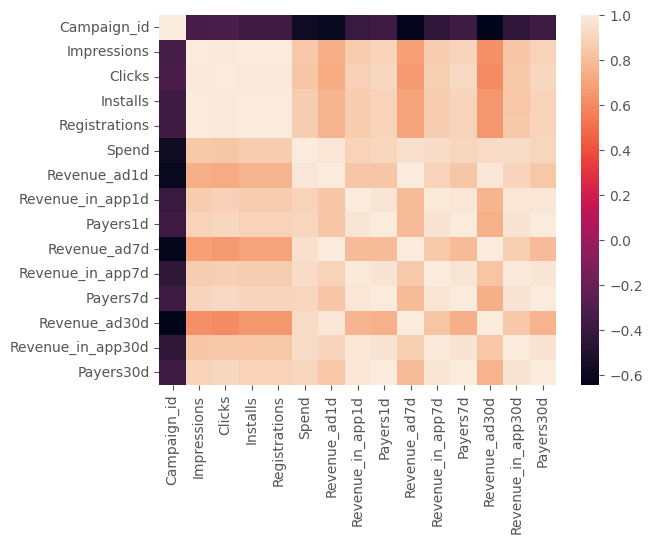

In [ ]:
sns.heatmap(df.corr())
plt.show()

In [ ]:
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Campaign_id,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d
Campaign_id,1.000000,-0.334805,-0.317680,-0.368788,-0.369887,-0.578721,-0.606173,-0.394978,-0.366881,-0.626930,-0.439385,-0.373160,-0.641104,-0.434141,-0.384052
Impressions,-0.334805,1.000000,0.992680,0.997102,0.995874,0.850459,0.741610,0.863525,0.895288,0.673468,0.866330,0.902854,0.620180,0.838837,0.895672
Clicks,-0.317680,0.992680,1.000000,0.989069,0.989849,0.837281,0.727475,0.884682,0.913572,0.659492,0.876716,0.919847,0.606434,0.850469,0.911863
Installs,-0.368788,0.997102,0.989069,1.000000,0.998247,0.867692,0.765664,0.860372,0.893469,0.700284,0.868809,0.900617,0.648191,0.843695,0.893902
Registrations,-0.369887,0.995874,0.989849,0.998247,1.000000,0.866191,0.765926,0.864778,0.895188,0.702225,0.870924,0.901886,0.651246,0.847528,0.895719
Spend,-0.578721,0.850459,0.837281,0.867692,0.866191,1.000000,0.976967,0.892586,0.906705,0.952398,0.934936,0.905260,0.924306,0.934839,0.907815
Revenue_ad1d,-0.606173,0.741610,0.727475,0.765664,0.765926,0.976967,1.000000,0.836885,0.839503,0.994012,0.891370,0.835531,0.979470,0.902108,0.841582
Revenue_in_app1d,-0.394978,0.863525,0.884682,0.860372,0.864778,0.892586,0.836885,1.000000,0.974341,0.799277,0.984887,0.975407,0.768704,0.975856,0.974602
Payers1d,-0.366881,0.895288,0.913572,0.893469,0.895188,0.906705,0.839503,0.974341,1.000000,0.795231,0.967541,0.997641,0.752631,0.965035,0.996090
Revenue_ad7d,-0.626930,0.673468,0.659492,0.700284,0.702225,0.952398,0.994012,0.799277,0.795231,1.000000,0.858215,0.789493,0.993977,0.875412,0.798020


2 наиболее коррелирующих признака

In [ ]:
corr_matrix = df.corr().abs()
most_correlated = corr_matrix.unstack().sort_values(ascending=False)
most_correlated_names = most_correlated[most_correlated != 1].index[0]
print(most_correlated_names)

('Payers7d', 'Payers30d')


<ipython-input-10-5f5a97c2bfc1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


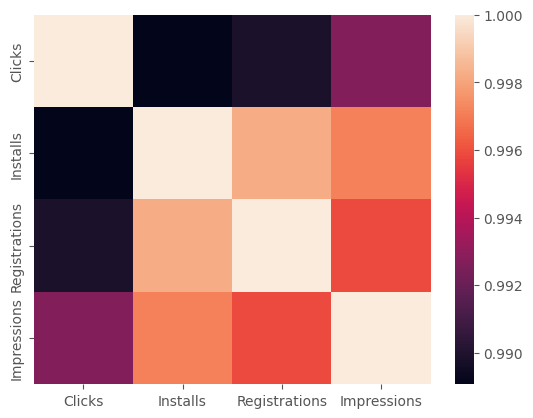

In [ ]:
df_max_corr = pd.DataFrame(df, columns=['Clicks','Installs','Registrations','Impressions'])
sns.heatmap(df_max_corr.corr())
plt.show()

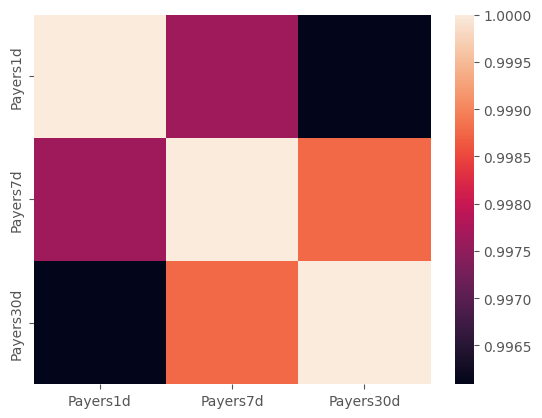

In [ ]:
df_max_corr2 = pd.DataFrame(df, columns=['Payers1d','Payers7d','Payers30d'])
sns.heatmap(df_max_corr2.corr())
plt.show()

Покупатели, которые платили первые 7 дней, скорее всего платят и на 30 дней. Высокая корреляция

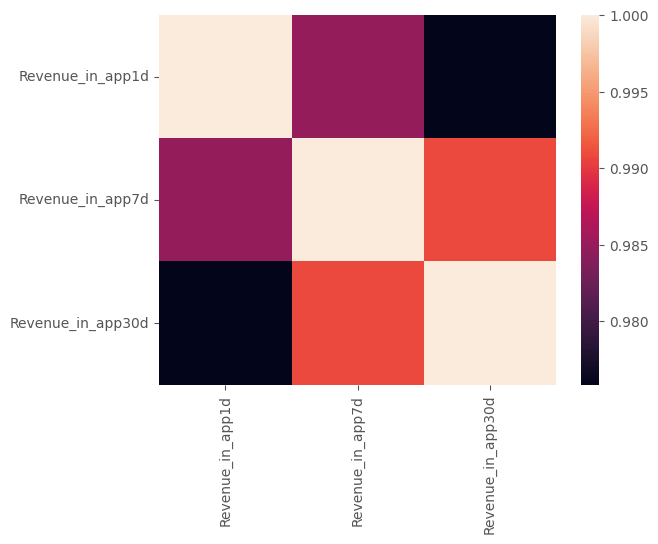

In [ ]:
df_max_corr2 = pd.DataFrame(df, columns=['Revenue_in_app1d','Revenue_in_app7d','Revenue_in_app30d'])
sns.heatmap(df_max_corr2.corr())
plt.show()

Максимально коррелируют помимо этого количество регистраций и установок. Сколько людей установило приложение, столько же и зарегистрировалось

Различают несколько групп продуктовых метрик:
* Метрики привлечения (Metrics for Acquisition)
* Метрики вовлеченности (Metrics for Engagement)
* Метрики производительности (Performance Metrics)

## Показатели

### Показатель кликабельности

CTR (Click-Through Rate) — показатель кликабельности

In [ ]:
df['CTR']=df['Clicks']/df['Registrations']
df['CTR']

0      5.904979
1      2.575980
2      4.409826
3      5.378029
4      2.484941
        ...    
82    17.346154
83     8.750000
84     5.042254
85     5.703704
86     3.852113
Name: CTR, Length: 87, dtype: float64

In [ ]:
df_sorted=df.sort_values('CTR',ascending=False)
df_sorted.groupby('Buyer')['Buyer'].head()

79    buyer_2
67    buyer_2
64    buyer_1
76    buyer_4
50    buyer_2
82    buyer_2
47    buyer_5
49    buyer_2
46    buyer_4
35    buyer_1
48    buyer_1
83    buyer_5
23    buyer_1
42    buyer_4
27    buyer_1
73    buyer_4
43    buyer_3
54    buyer_5
80    buyer_5
85    buyer_4
6     buyer_3
7     buyer_3
20    buyer_5
10    buyer_3
24    buyer_3
Name: Buyer, dtype: object

In [ ]:
df_sorted['CTR'].describe()

count    87.000000
mean      7.793990
std      11.253464
min       1.532468
25%       3.592991
50%       4.967742
75%       6.828571
max      74.500000
Name: CTR, dtype: float64

In [ ]:
fig = px.line(df, x=df.index, y='CTR', title='Click-Through Rate (CTR) Over Time')
fig.show()

In [ ]:
buyer_ctr = df.groupby('Buyer')['CTR'].mean().reset_index()

fig = px.bar(buyer_ctr, x='Buyer', y='CTR', title='Average CTR by Buyer')
fig.show()

Лучший показатель кликабельности был у баера 1 и баера 2

Значит эти баеры лучше привлекают клиентов

In [ ]:
geo_ctr = df.groupby('Geo')['CTR'].mean().reset_index()

fig = px.bar(geo_ctr, x='Geo', y='CTR', title='Average CTR by Geo')
fig.show()

### Cтоимость клика

CPC (Cost Per Click) — стоимость клика

In [ ]:
df['CPC']=df['Spend']/df['Clicks']
df['CPC']

0     0.024774
1     0.248893
2     0.034487
3     0.122973
4     0.118830
        ...   
82    0.045698
83    0.097857
84    0.057067
85    0.132662
86    0.037313
Name: CPC, Length: 87, dtype: float64

In [ ]:
geo_cpc = df.groupby('Geo')['CPC'].mean().reset_index()

fig = px.bar(geo_cpc, x='Geo', y='CPC', title='Average CPC by Geo')
fig.show()

В Австралии самая высокая цена клика. Тут стоит уменьшить финансирование или изменить стратегию

In [ ]:
buyer_cpc = df.groupby('Buyer')['CPC'].mean().reset_index()

fig = px.bar(buyer_cpc, x='Buyer', y='CPC', title='Average CPC by buyer')
fig.show()

 Наибошльшая цена клика у баера3, наименьшая у баера 1 - это лучший показатель

Стоимость клика у баера3 слишком высокая

### Cтоимость привлечения

CAC(Cost of Customer Acquisition) - cтоимость привлечения

In [ ]:
df['CAC']=df['Spend']/df['Registrations']
df['CAC']

0     0.146290
1     0.641144
2     0.152080
3     0.661352
4     0.295286
        ...   
82    0.792692
83    0.856250
84    0.287746
85    0.756667
86    0.143732
Name: CAC, Length: 87, dtype: float64

In [ ]:
geo_cac = df.groupby('Geo')['CAC'].mean().reset_index()

fig = px.bar(geo_cac, x='Geo', y='CAC', title='Average CAC by Geo')
fig.show()

Снова очень высокая стоимость привлечения в Австралии

In [ ]:
buyer_cac = df.groupby('Buyer')['CAC'].mean().reset_index()

fig = px.bar(buyer_cac, x='Buyer', y='CAC', title='Average CAC by buyer')
fig.show()

На этом графике наибольшая цена привлечения у баера2, а наименьшая снова у баера1

Пока у баера 1 лучшие показатели

### Kонверсия страницы

CR (Conversion rate)  -  конверсия страницы

In [ ]:
df['CR']=df['Installs']/df['Clicks']
df['CR']

0     0.255227
1     0.539328
2     0.372719
3     0.312306
4     0.538200
        ...   
82    0.399113
83    0.328571
84    0.315642
85    0.376623
86    0.471664
Name: CR, Length: 87, dtype: float64

In [ ]:
geo_cr = df.groupby('Geo')['CR'].mean().reset_index()

fig = px.bar(geo_cr, x='Geo', y='CR', title='Average CR by Geo')
fig.show()

Конверсия должна быть высокой для удачных продаж. Высокая конверсия в North America, WesternEurope. Худшая конверсия снова в Австралии

In [ ]:
buyer_cr = df.groupby('Buyer')['CR'].mean().reset_index()

fig = px.bar(buyer_cr, x='Buyer', y='CR', title='Average CR by Buyer')
fig.show()

Несмотря на высокую стоимость привлечения у баера2, у негшо высокая конверсия. Остальные баеры имеют примерно одинаковую конверсию

### Стоимость установки приложения

CPI (Cost per Install) – стоимость установки приложения

In [ ]:
df['CPI']=df['Spend']/df['Installs']
df['CPI']

0     0.097067
1     0.461488
2     0.092527
3     0.393758
4     0.220792
        ...   
82    0.114500
83    0.297826
84    0.180796
85    0.352241
86    0.079109
Name: CPI, Length: 87, dtype: float64

In [ ]:
geo_cpi = df.groupby('Geo')['CPI'].mean().reset_index()

fig = px.bar(geo_cpi, x='Geo', y='CPI', title='Average CPI by Geo')
fig.show()

Видим тенденцию, что все действия в Австралии имеют высокую стоимость

In [ ]:
buyer_cpi = df.groupby('Buyer')['CPI'].mean().reset_index()

fig = px.bar(buyer_cpi, x='Buyer', y='CPI', title='Average CPI by buyer')
fig.show()

Стоимость установки у баера3 и 5 наибольшие. У баера1 снова низкая цена

### Цена за приобретение

CPA (Cost Per Acquisition)-цена за приобретение

In [ ]:
df['CPA']=df['Spend']/df['Payers30d']
df['CPA']

0      38.655904
1      71.341818
2     205.333333
3     102.344167
4     145.428334
         ...    
82           inf
83           inf
84           inf
85     20.430000
86           inf
Name: CPA, Length: 87, dtype: float64

In [ ]:
buyer_cpa = df.groupby('Buyer')['CPA'].mean().reset_index()

fig = px.bar(buyer_cpa, x='Buyer', y='CPA', title='Average CPA by buyer')
fig.show()

 ### Окупаемость инвестиций

ROI (Return on Investment) - Окупаемость инвестиций

In [ ]:
df['ROI']=(df['Revenue_ad30d']+df['Revenue_in_app30d']+df['Spend'])/df['Spend']
df['ROI']

0     1.562156
1     1.999829
2     1.484849
3     1.895965
4     1.855753
        ...   
82    1.367966
83    1.117043
84    2.506799
85    1.617103
86    1.607478
Name: ROI, Length: 87, dtype: float64

In [ ]:
geo_roi = df.groupby('Geo')['ROI'].mean().reset_index()

fig = px.bar(geo_roi, x='Geo', y='ROI', title='Average ROI by Geo')
fig.show()

В north america, western europe лучшая окупаемость, в Австралии худшая

In [ ]:
buyer_roi = df.groupby('Buyer')['ROI'].mean().reset_index()

fig = px.bar(buyer_roi, x='Buyer', y='ROI', title='Average ROI by buyer')
fig.show()

У баера3 лучшая окупаемость, у баера5 худшая

### Маржа чистой прибыли

NPM (Net Profit Margin) - Маржа чистой прибыли

In [ ]:
df['NPM']=(df['Revenue_ad30d']+df['Revenue_in_app30d']-df['Spend'])/(df['Revenue_ad30d']+df['Revenue_in_app30d'])
df['NPM']

0    -0.778866
1    -0.000171
2    -1.062499
3    -0.116115
4    -0.168562
        ...   
82   -1.717644
83   -7.543874
84    0.336341
85   -0.620476
86   -0.646151
Name: NPM, Length: 87, dtype: float64

In [ ]:
buyer_npm = df.groupby('Buyer')['NPM'].mean().reset_index()

fig = px.bar(buyer_npm, x='Buyer', y='NPM', title='Average NPM by buyer')
fig.show()

отрицательная маржа

### Средний чек

Средний чек (Average Order Value, AOV)

In [ ]:
df['AOV30']=df['Revenue_in_app30d']/df['Payers30d']
df['AOV30']

0     3.332892
1     5.465909
2     4.116667
3     4.794167
4     5.358334
        ...   
82         NaN
83         NaN
84         NaN
85    7.480000
86         NaN
Name: AOV30, Length: 87, dtype: float64

In [ ]:
buyer_aov = df.groupby('Buyer')['AOV30'].mean().reset_index()

fig = px.bar(buyer_aov, x='Buyer', y='AOV30', title='Average AOV by buyer')
fig.show()

Низкий чек у баера5, лучшие чеки у баера 3 и баера4

In [ ]:
df['AOV7']=df['Revenue_in_app7d']/df['Payers7d']
df['AOV7']

0     2.528481
1     3.649474
2     4.116667
3     2.786667
4     4.128000
        ...   
82         NaN
83         NaN
84         NaN
85    1.490000
86         NaN
Name: AOV7, Length: 87, dtype: float64

In [ ]:
buyer_aov = df.groupby('Buyer')['AOV7'].mean().reset_index()

fig = px.bar(buyer_aov, x='Buyer', y='AOV7', title='Average AOV by buyer')
fig.show()

На 7 день у баер3 все еще один из лучших чеков

In [ ]:
df['AOV1']=df['Revenue_in_app1d']/df['Payers1d']
df['AOV1']

0     2.534688
1     2.191176
2     0.815000
3     2.375455
4     4.757500
        ...   
82         NaN
83         NaN
84         NaN
85    1.490000
86         NaN
Name: AOV1, Length: 87, dtype: float64

In [ ]:
buyer_aov = df.groupby('Buyer')['AOV1'].mean().reset_index()

fig = px.bar(buyer_aov, x='Buyer', y='AOV1', title='Average AOV by buyer')
fig.show()

На 1 день у баер3 все еще один из лучших чеков, у баера 5 и баера 1 худший

## Графики

Линеяный график показов и кликов рекламы

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['Clicks'], mode='lines', name='Clicks'))
fig.add_trace(go.Scatter(x=df.index, y=df['Impressions'], mode='lines', name='Impressions'))
fig.update_layout(title='Clicks and Impressions Over Time')
fig.show()

In [ ]:
fig = px.scatter(df, x='Clicks', y='Impressions', title='Relationship Between Clicks and Impressions',
                 labels={'Clicks': 'Clicks', 'Impressions': 'Impressions'})

fig.update_layout(xaxis_title='Clicks', yaxis_title='Impressions')

fig.show()

Есть линейная зависимость. Чем больше кликов, тем больше показов

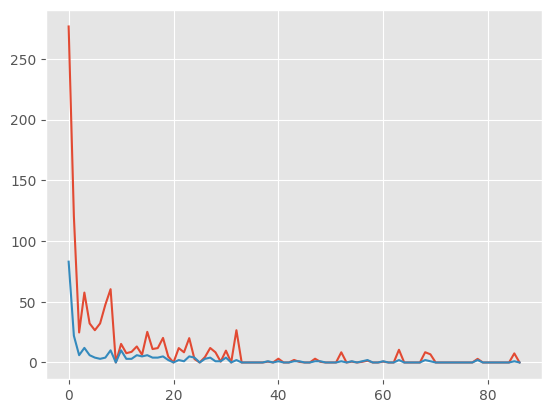

In [ ]:
import matplotlib.pyplot as plt

df['Revenue_in_app30d'].plot()
#
df['Payers30d'].plot()
plt.show()

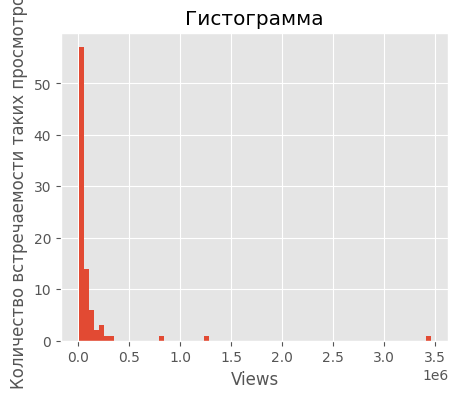

In [ ]:
x = df['Impressions']

fig, ax = plt.subplots(figsize = (5,4))
plt.hist(x, bins = 70)

plt.xlabel("Views")
plt.ylabel("Количество встречаемости таких просмотров")
plt.title('Гистограмма')
plt.show();

Есть определенные посты, которые очень сильно просматривали, но таких очень мало

В основном постов меньше чем 300 000

Чаще всего около 100 000 просмотров

In [ ]:
x_geo=np.unique(df['Geo'])
x_geo

array(['australia oceania', 'cis', 'latin america', 'north africa',
       'north america', 'tropical africa', 'western europe'], dtype=object)

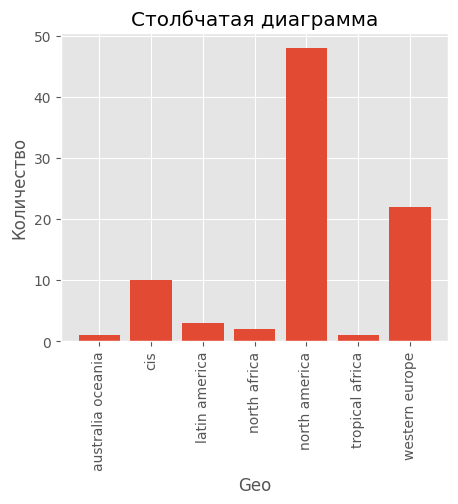

In [ ]:
x = list(df['Geo'])

fig, ax = plt.subplots(figsize = (5,4))
plt.bar(x=x_geo,height = [x.count(np.unique(x)[0]), x.count(np.unique(x)[1]),
                          x.count(np.unique(x)[2]), x.count(np.unique(x)[3]),
                          x.count(np.unique(x)[4]), x.count(np.unique(x)[5]),
                          x.count(np.unique(x)[6])])
plt.xticks(rotation=90)
plt.xlabel("Geo")
plt.ylabel("Количество")
plt.title('Столбчатая диаграмма')
plt.show();

Больше всего кампаний было в Северной Америке и Западной Европе, меньше всего в Австралии и Африке

In [ ]:
df['Geo'].mode()

0    north america
Name: Geo, dtype: object

North America, Western Europe, самые активные страны

In [ ]:
x_buyer=np.unique(df['Buyer'])
x_buyer

array(['buyer_1', 'buyer_2', 'buyer_3', 'buyer_4', 'buyer_5'],
      dtype=object)

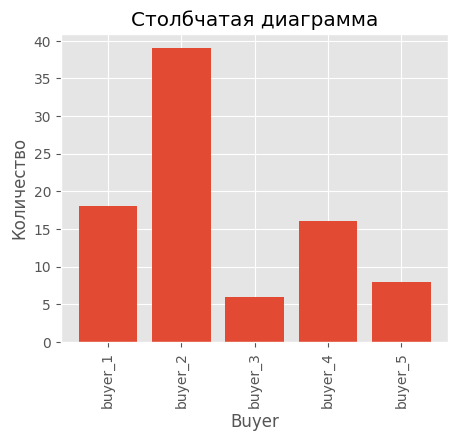

In [ ]:
x = list(df['Buyer'])

fig, ax = plt.subplots(figsize = (5,4))
plt.bar(x=x_buyer,height = [x.count(np.unique(x)[0]), x.count(np.unique(x)[1]),
                          x.count(np.unique(x)[2]), x.count(np.unique(x)[3]),
                          x.count(np.unique(x)[4])])
plt.xticks(rotation=90)
plt.xlabel('Buyer')
plt.ylabel("Количество")
plt.title('Столбчатая диаграмма')
plt.show();

In [ ]:
df['Buyer'].mode()

0    buyer_2
Name: Buyer, dtype: object

2баер имел большего всего кампаний, баер3 имел меньше всего рекламных кампаний

### Выбросы

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning:

invalid value encountered in subtract

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1257: RuntimeWarning:

invalid value encountered in less_equal

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1264: RuntimeWarning:

invalid value encountered in greater_equal

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1273: RuntimeWarning:

invalid value encountered in greater



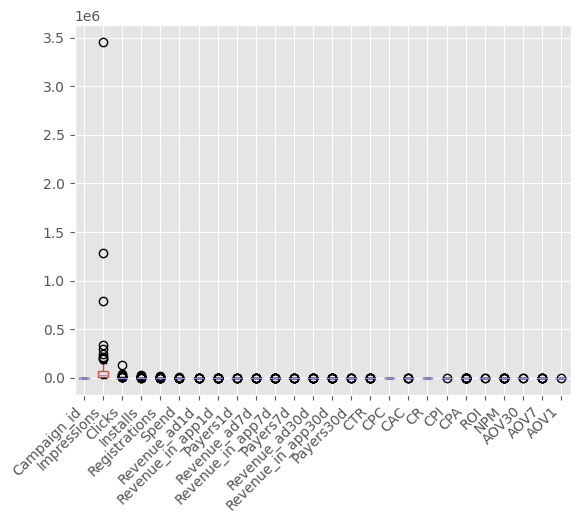

In [ ]:
bp= pd.DataFrame.boxplot(pd.DataFrame(df), return_type='dict')
outliers = [flier.get_ydata() for flier in bp["fliers"]]
#df[df.Mortgage.isin(outliers)]
plt.xticks(rotation=45,
           ha='right');

<ipython-input-57-ec6e835795f4>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Impressions', ylabel='Density'>

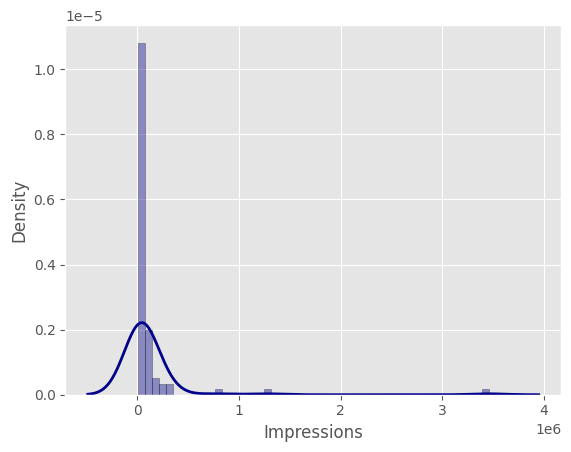

In [ ]:
sns.distplot(df['Impressions'], hist=True, kde=True,
             color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}
             )

Есть рекламы, которые очень сильно "залетели" по просмотрам

В основном в работе использовались графики для наглядного представления информации. Однако есть возможно провести более детальный анализ используя такие функции питона как loc и iloc. Но мне кажется, что наглядность на данном этапе важнее